In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler

In [2]:
#Load the dataset
df = pd.read_csv('customer_data_records.csv')

#Display the first rows of the dataset
print(df.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90


In [ ]:
#Select Features for clustering
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#Can also use iloc to select columns/features for clustering
x = df.iloc[:, [1, 2]].values #selects columns 1 and 2 as 'Annual Income' and 'Spending score' for all rows

In [ ]:
#Feature scaling - it is important to scale the features before clustering
scaler = StandardScaler()  #Create a StandardScaler object
x_scaled = scaler.fit_transform(x) #Standardize the features to have mean=0 and variance=1

In [ ]:
#Elbow method: helps to determine the optimal number of cluster
wcss = [] # List to store the within-cluster sum of squares
for i in range(1, 11):  #determins number of clusters from 1 to 10
    kmeans = cluster.KMeans(n_clusters=i, random_state=42) #create KMeans object with i clusters
    kmeans.fit(x_scaled) #fit the model to the scaled data
    wcss.append(kmeans.inertia_) #append the inertia

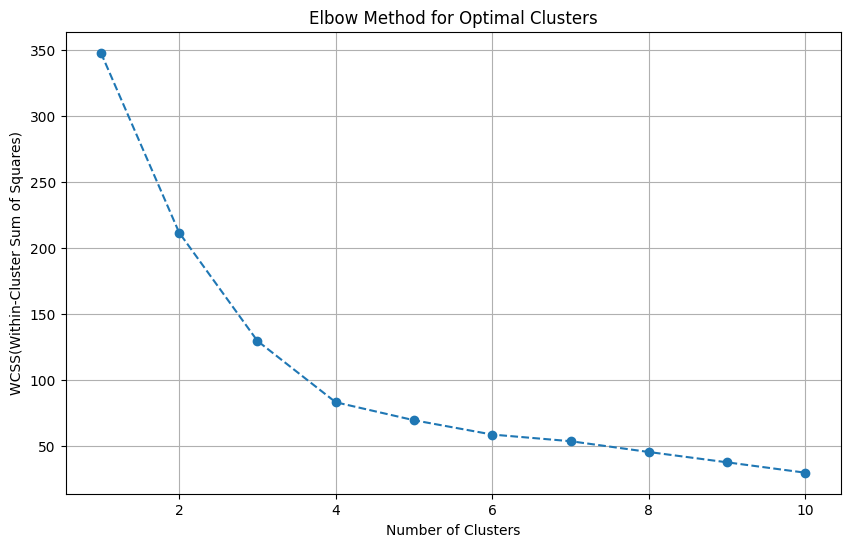

In [7]:
#Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS(Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [8]:
#Based on Elbow method, lets assume the optimal number of clusters is 5
optimal_clusters = 5 

#Apply KMeans clustering 
kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(x_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [9]:
#Apply K-Means with optimal number of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

In [10]:
#Add cluster labels to the original data
df['Cluster'] = y_kmeans  #creates new column cluster in the original dataset

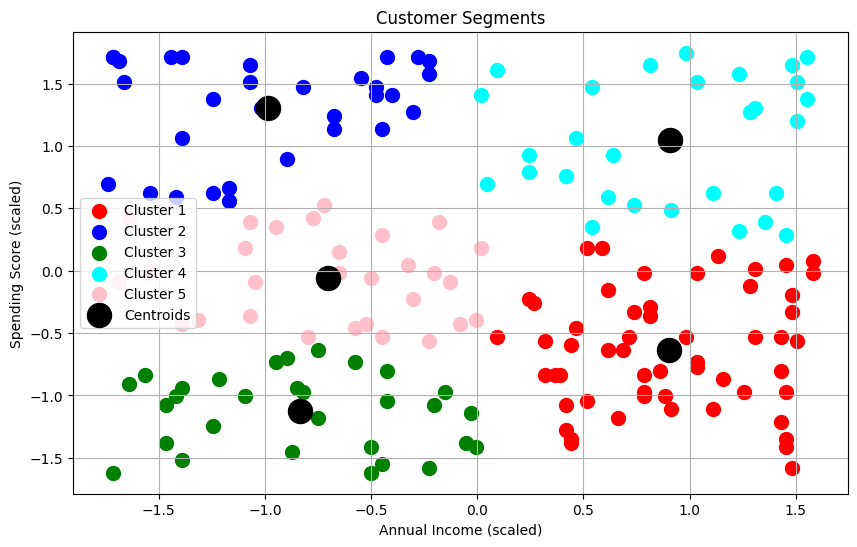

In [12]:
#Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x_scaled[y_kmeans == 3, 0], x_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x_scaled[y_kmeans == 4, 0], x_scaled[y_kmeans == 4, 1], s=100, c='pink', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
#Add cluster Labels to our dataset
df['Cluster'] = kmeans.labels_
print(df)

     CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1                 117                      20        0
1             2                 107                      59        3
2             3                  29                      36        4
3             4                 121                      19        0
4             5                  86                      90        3
..          ...                 ...                     ...      ...
169         170                 111                      76        3
170         171                 138                      87        3
171         172                  84                      15        2
172         173                 107                      92        3
173         174                  17                      98        1

[174 rows x 4 columns]


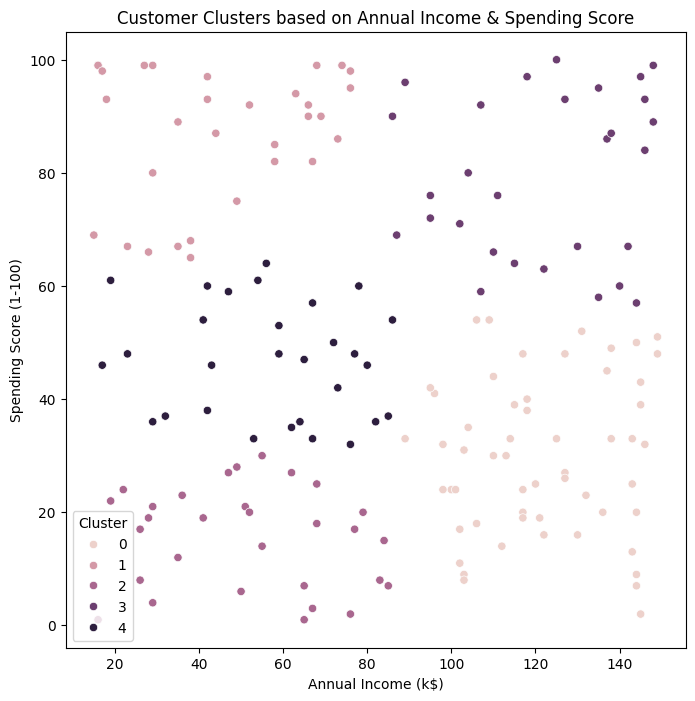

In [14]:
#Visualize the cluster
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x= 'Annual Income (k$)', y= 'Spending Score (1-100)', hue='Cluster')
plt.title('Customer Clusters based on Annual Income & Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()